# Titanic Passenger Data Analysis
### Intro Data Analysis
##### Tania Lincoln 06/10/2017

### Summary
This is preliminary investigation of the Titanic passenger data.  The dataset was taken from Kaggle.  This analysis is done as part of the Data Analyst Nanodegree program.  The goal of this project is to explore the data and pose questions.  Machine learning and advanced statistical analysis is not required at this time.  This project will be a work in progress in order to gain experience.

Some ideas for analysis came from the women in data science workshop
<br>
https://github.com/womenindatascienceatx/titanic-EDA/blob/master/Titanic%204-21-2016%20-%20Answers.ipynb


### Import Libraries
Import some common libraries and use common abbreviations

In [1]:
# import important libraries
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import csv
import statsmodels
import seaborn as sns
%matplotlib inline

# Set default matplot figure size
mpl.pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Display Current Environment Info
It's a good practice to display the environment information

In [2]:
# print environment variables, so others can see what we are using
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)
print("stats " + statsmodels.__version__)

python 2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]

pandas 0.19.2
numpy 1.11.3
matplotlib 2.0.0
seaborn 0.7.1
stats 0.6.1


### Load Data

In [3]:
# use pandas to read the csv file and put it in a dataframe
titanic_df = pd.read_csv("titanic-data.csv", delimiter=",")

### Initial Learnings
Use info() to see column names, the total number per column, and the given datatype.
<br>
This can also be achieved in two steps, using .count() and .dtypes()

#### Column Names, Counts, and Datatypes

In [4]:
# view the column names and datatype of the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


> *Observation*:  
<br>
> Age, Cabin, and Embarked have null values.  Will need to decide what to impute and what to exclude.

#### Sample data
Use head() or head(number) to see several rows of the dataframe.

In [5]:
# see a sample of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> *Observation*:  <br>
> Pclass is probably related to Fare and similar to first class, economy...etc. <br>
> More info is needed about SibSp, Parch, and Embarked. <br>

>> Went to the <a href="https://www.kaggle.com/c/titanic/data">Kaggle Data Dictionary</a> to find theses definitions

>>- **Survived**:        Survival (0 = No; 1 = Yes)
>>- **Pclass**:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **Name**:            Name
- **Sex**:             Sex
- **Age**:             Age
- **SibSp**:           Number of Siblings/Spouses Aboard
- **Parch**:           Number of Parents/Children Aboard
- **Ticket**:          Ticket Number
- **Fare**:            Passenger Fare
- **Cabin**:           Cabin
- **Embarked**:        Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

#### Basic Stats
Use .describe() to see basic statistics about the dataframe.  
Numeric values will have a mean, std, min, max, and quantile data

In [6]:
# view basic statistic of the dataset
titanic_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


> *Observation*:  
<br>
> Age, Cabin, and Embarked have null values.  Will need to decide what to impute and what to exclude.
<br>
> PassengerId will not be included in the analysis, since it's a key field.
<br>
> Name doesn't seem relevant to the analysis and will be excluded.
<br>
> Cabin has too many null values to be meaningful.
<br>
> Pclass and Fare are probably related.  We should examine that hunch and then just look at one feature.

### Explore the Data (basic exploration)

Some basic questions, we may want to investigate are:
- How many people survived or died?
- What were the passengers like:  gender, age, class?
- Did they travel alone or with family?
- Where did they embark?

In [7]:
# make function for counting and graphing
def CountByGrouping (titleInput, df, groupBy, pageBy=None):
    '''
    See the total counts of each group.  Graph the results with an optional page-by
    '''
    graph = sns.factorplot(groupBy, data=df, kind='count', hue=pageBy, aspect=4, palette='Paired')
    graph.set(title=titleInput)
    #graph.addlegend()
    if pageBy is None:
        return df.groupby(groupBy)[groupBy].count()
    else:
        return df.groupby([groupBy, pageBy])[groupBy].count()

##### Question:  How many people survived and perished?

Survived
0    549
1    342
Name: Survived, dtype: int64

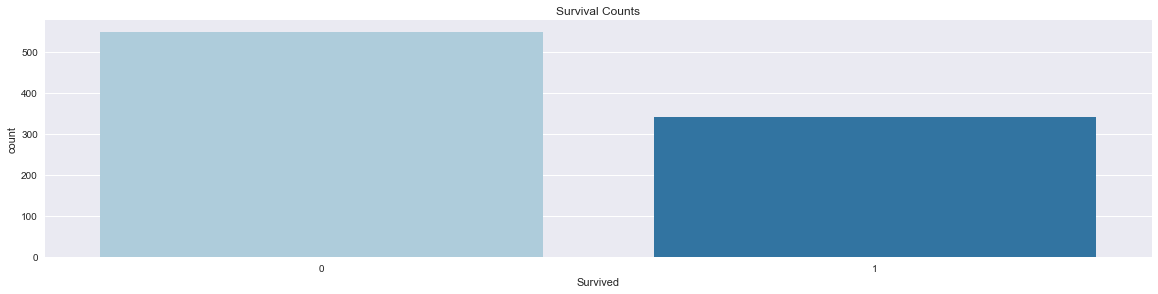

In [8]:
CountByGrouping('Survival Counts', titanic_df, 'Survived')

More people perished than survived.

##### Question: How many people are in each class?

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

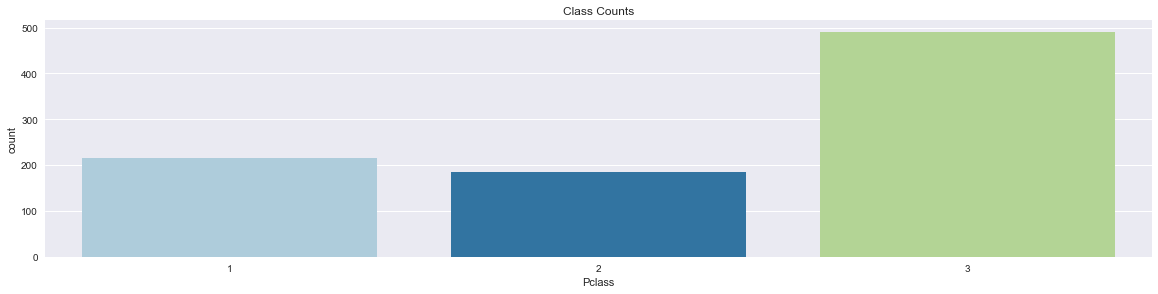

In [9]:
CountByGrouping('Class Counts', titanic_df, 'Pclass')

Most of the passengers are in the third (economy class).

##### Question:  How many males and females boarded the titanic?

Sex
female    314
male      577
Name: Sex, dtype: int64

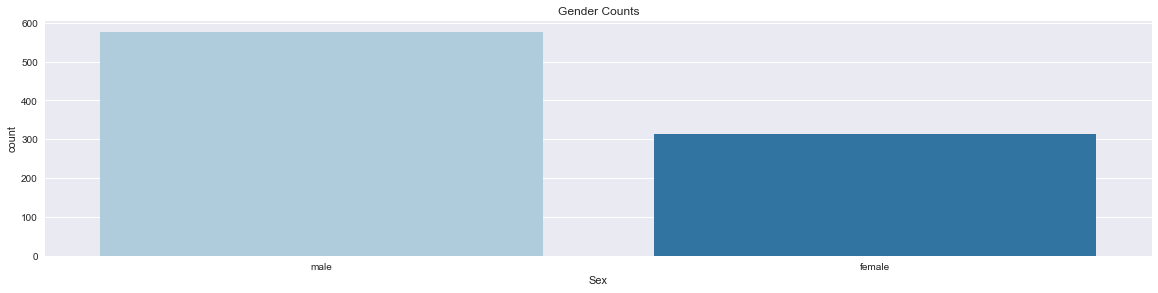

In [10]:
CountByGrouping('Gender Counts', titanic_df, 'Sex')

There were more males than females on the Titanic.

##### Question:  How old are the passengers?

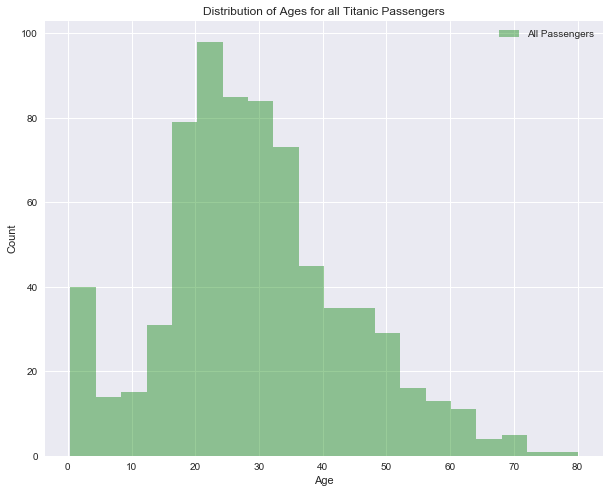

In [11]:
# create a histogram of the ages to see how they are distributed
fare_dist = sns.distplot(titanic_df['Age'].dropna(), kde=False, norm_hist=False, color='green', label="All Passengers")

# assign labels for the axis and title
fare_dist.set_xlabel("Age")
fare_dist.set_ylabel("Count")
fare_dist.set_title("Distribution of Ages for all Titanic Passengers")

# show the legend, this will display the label parameter in the distplot function
fare_dist.legend()


There were a lot of 20-30 year old passengers.  I'm surprised there are so many children and seniors on board too.

##### Question:  How should null values be handled?

In [12]:
# since we know there are nulls, just look at some of those records again
titanic_df[titanic_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [13]:
# what is the average age by gender
titanic_df.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [14]:
# what is the overall average age
titanic_df['Age'].median()

28.0

In [15]:
# keep the original values of age around in case we need them
# fill in the nulls with averages
titanic_df['AgeOriginal'] = titanic_df['Age']
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [16]:
# check to make sure the null were populated
titanic_df['Age'].isnull().sum()

0

In [17]:
# check a couple of the null rows
print(titanic_df.ix[5])
print(titanic_df.ix[17])

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          28
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
AgeOriginal                 NaN
Name: 5, dtype: object
PassengerId                              18
Survived                                  1
Pclass                                    2
Name           Williams, Mr. Charles Eugene
Sex                                    male
Age                                      28
SibSp                                     0
Parch                                     0
Ticket                               244373
Fare                                     13
Cabin                                   NaN
Embarked                                  S
AgeOriginal                      

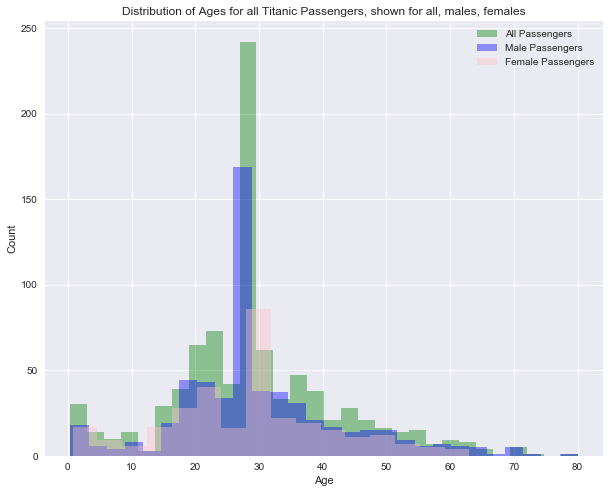

In [18]:
# create a layered vizualization, so we can see age distributions for all passengers, men, and women
fare_dist = sns.distplot(titanic_df['Age'], kde=False, norm_hist=False, color='green', label="All Passengers")

fare_dist = sns.distplot(titanic_df['Age'][titanic_df['Sex'] == "male"], \
                         kde=False, norm_hist=False,  color = "blue", label="Male Passengers")

fare_dist = sns.distplot(titanic_df['Age'][titanic_df['Sex'] == "female"], \
                         kde=False, norm_hist=False,  color ="pink", label="Female Passengers")

# assign labels for the axis and title
fare_dist.set_xlabel("Age")
fare_dist.set_ylabel("Count")
fare_dist.set_title("Distribution of Ages for all Titanic Passengers, shown for all, males, females")

# show the legend, this will display the label parameter in the distplot function
fare_dist.legend()

This graph shows that most of the 30 year olds are men.  
There are fewer women, but the genders seem to generally have the same age distribution pattern.

#### Question:  How many children, adults, and seniors are on board?
This will make some of the more complex analysis easier.

In [19]:
def defineAgeGroup(age):
    '''
    create some age group buckets, so we can look at other variables
    with the age classification defined.
    '''
    if age < 18:
        return 'Child'
    elif age >= 60:
        return 'Senior'
    else:
        return 'Adult'
    

In [20]:
# create a new column for ageGroup using the new function
titanic_df['AgeGroup'] = titanic_df['Age'].apply(defineAgeGroup)

In [21]:
# check the age group results
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeOriginal,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adult


AgeGroup
Adult     752
Child     113
Senior     26
Name: AgeGroup, dtype: int64

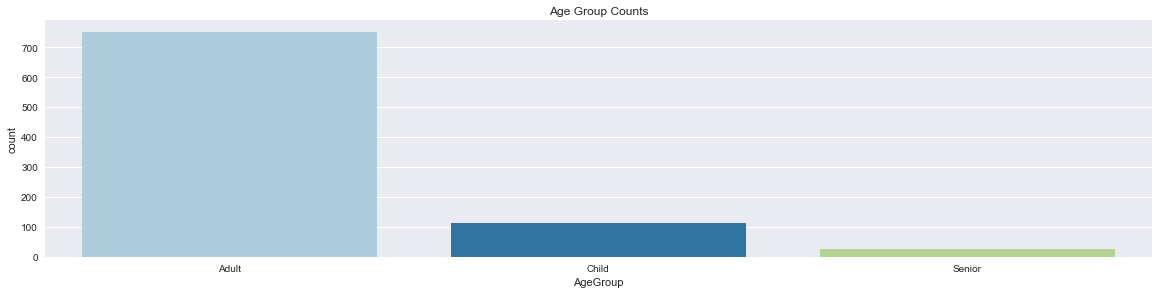

In [22]:
# See the counts for adults, children, and seniors
CountByGrouping('Age Group Counts', titanic_df, 'AgeGroup')

Most of the passengers are adults.  Very few are seniors.

##### Question:  How many families and single people boarded the titanic?

In [23]:
def individual_only(groupCount):
    '''
    If someone had siblings, a spouse, parents, or children with them, consider them as being part of a family.
    '''
    SibSp, Parch = groupCount
    #if (groupCount['SibSp'] + groupCount['Parch']) > 0:
    if SibSp + Parch > 0:
        return 'Family'
    else:
        return 'Single'

titanic_df['Families'] = titanic_df[['SibSp', 'Parch']].apply(individual_only, axis=1)

Families
Family    354
Single    537
Name: Families, dtype: int64

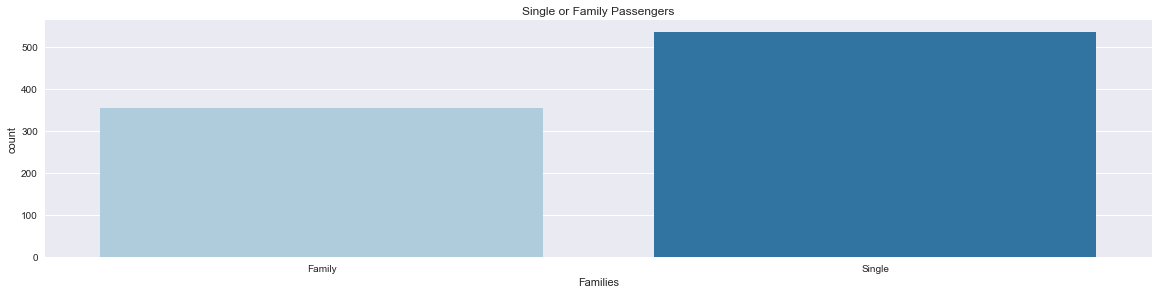

In [24]:
CountByGrouping('Single or Family Passengers', titanic_df, 'Families')

There were more single people than there were families.

##### Question:  Where did people board the Titanic?

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

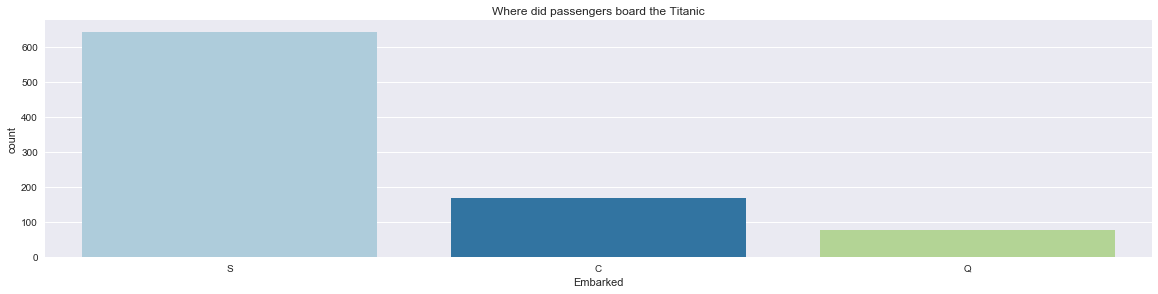

In [25]:
CountByGrouping('Where did passengers board the Titanic', titanic_df, 'Embarked')

Most passengers embarked in Southampton.

### Explore the Data (more complex questions)

Some more comples questions we may want to investigate are:
- Who traveled on their own?
- What was the social status of the various groups: gender, individual, family?
- Did the different social statuses come from a certain city?
- Did more men or women survive?
- If you were traveling alone or with family were you more likely to survive?

#### Question:  Were men or women more likely to travel alone or with someone?

Families  Sex   
Family    female    188
          male      166
Single    female    126
          male      411
Name: Families, dtype: int64

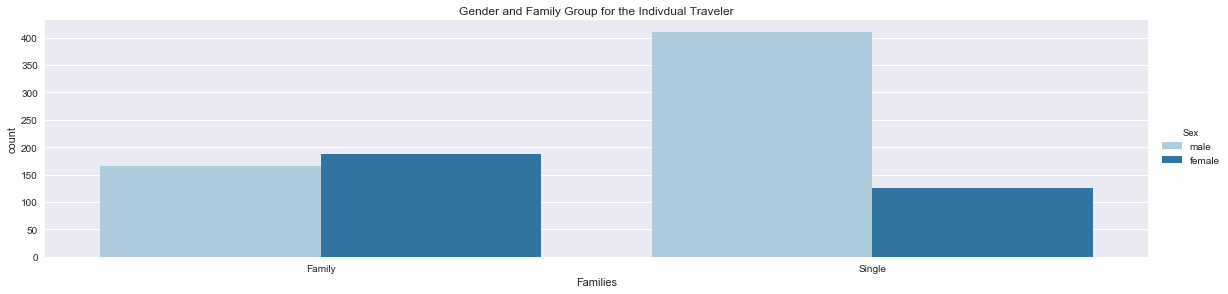

In [26]:
CountByGrouping('Gender and Family Group for the Indivdual Traveler', titanic_df, 'Families', 'Sex')

Men traveled solo far more than women did.

#### Question:  Who are these solo travelers?  Let's take a closer look.

In [27]:
# create a dataframe of only the single traveler
individualTravelers_df = titanic_df[titanic_df['Families'] == "Single"]

Pclass  Sex   
1       female     34
        male       75
2       female     32
        male       72
3       female     60
        male      264
Name: Pclass, dtype: int64

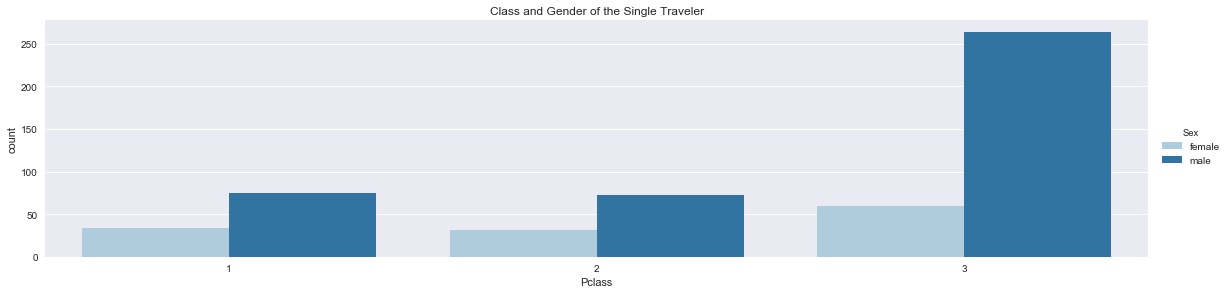

In [28]:
# group the individual traveler by class and gender
CountByGrouping('Class and Gender of the Single Traveler', individualTravelers_df, 'Pclass', 'Sex')

As an individual traveler, you were most likely to be in third class.

AgeGroup  Sex   
Adult     female    113
          male      382
Child     female     11
          male       12
Senior    female      2
          male       17
Name: AgeGroup, dtype: int64

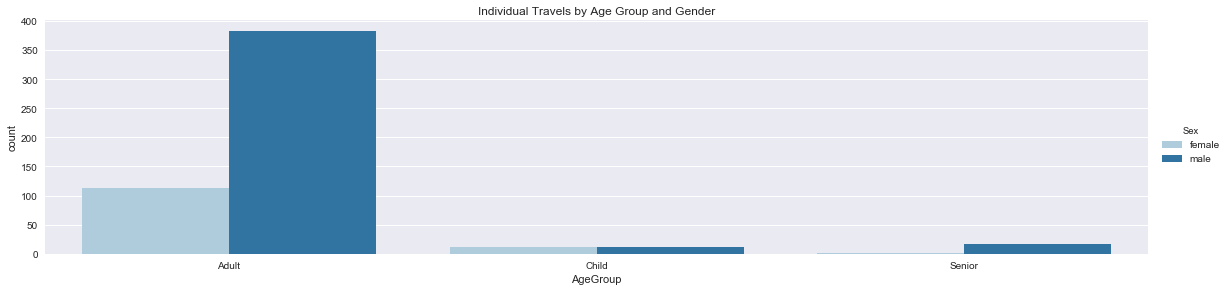

In [29]:
# examine the individual traveler by age group and gender
CountByGrouping('Individual Travels by Age Group and Gender', individualTravelers_df, 'AgeGroup', 'Sex')

Individual travelers were also adult males, mostly.

##### Question:  Did more men or women survive?

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

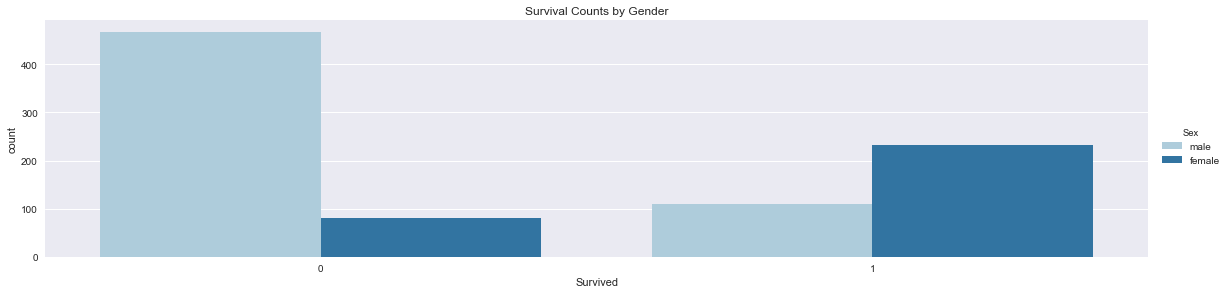

In [30]:
# examine who survived by gender
CountByGrouping('Survival Counts by Gender', titanic_df, 'Survived', 'Sex')

#### Question:  Did class have anything to do with survival rates

A lot of men died on the Titanic, 468.  Where as only 81 females died.

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

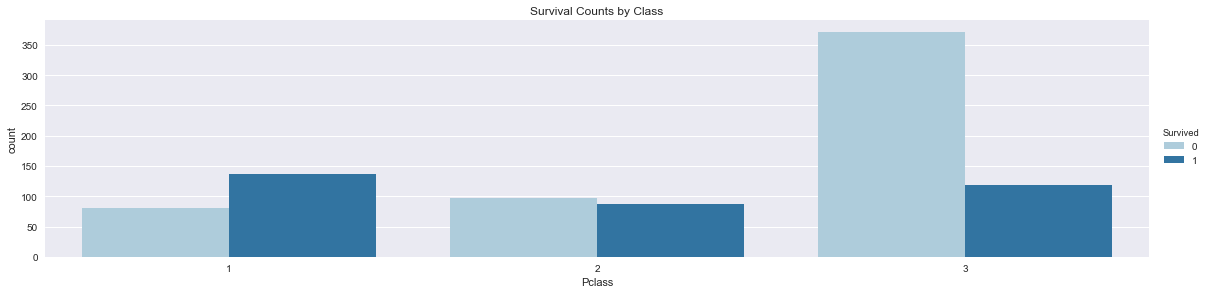

In [31]:
# vizualize how many survived out of each class
CountByGrouping('Survival Counts by Class', titanic_df, 'Pclass', 'Survived')

Many more third class passengers perished.

#### Question:  Did single men travelers survive less?

Pclass  Survived
1       0            50
        1            25
2       0            65
        1             7
3       0           232
        1            32
Name: Pclass, dtype: int64

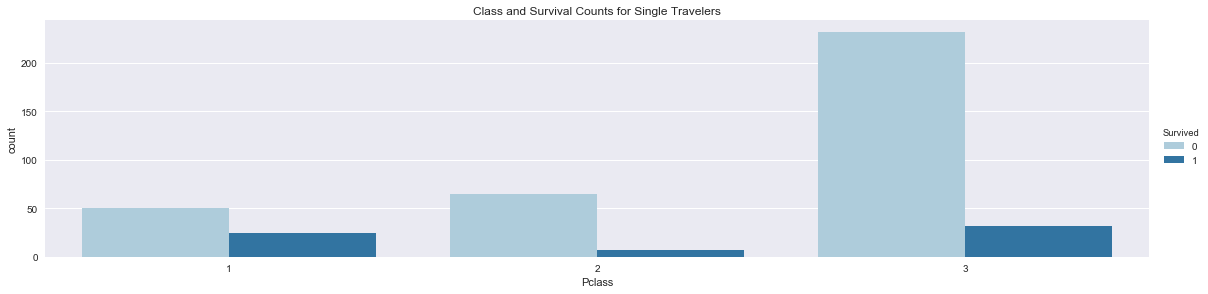

In [32]:
# take a look at the survial counts of the single travel and see who survived
CountByGrouping('Class and Survival Counts for Single Travelers', \
                individualTravelers_df[individualTravelers_df['Sex'] == "male"], 'Pclass', 'Survived')

So, individual travelers were third class, adult, males.  It seems if you travelled alone and were male, you died.

#### Question:  Does embarkment city make a difference?

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Embarked, dtype: int64

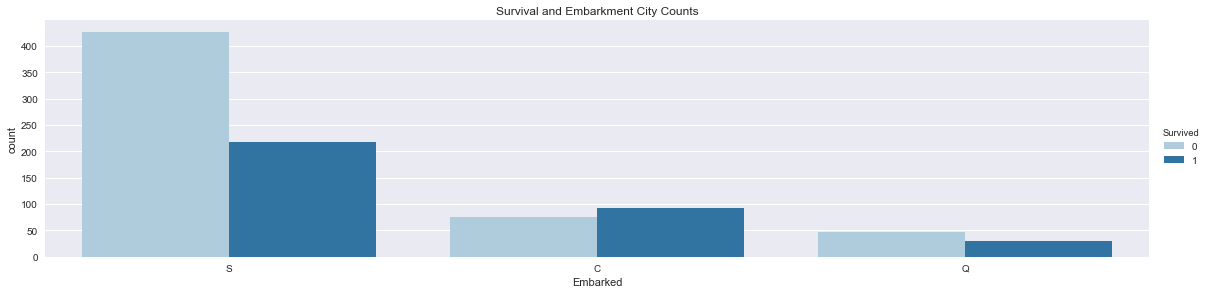

In [33]:
# look at survival rates by embarkment city
CountByGrouping('Survival and Embarkment City Counts', titanic_df, 'Embarked', 'Survived')

I think embarkment city count is high only because so many people boarded there and really relevant to survival.

#### Question:  How much did passengers pay?

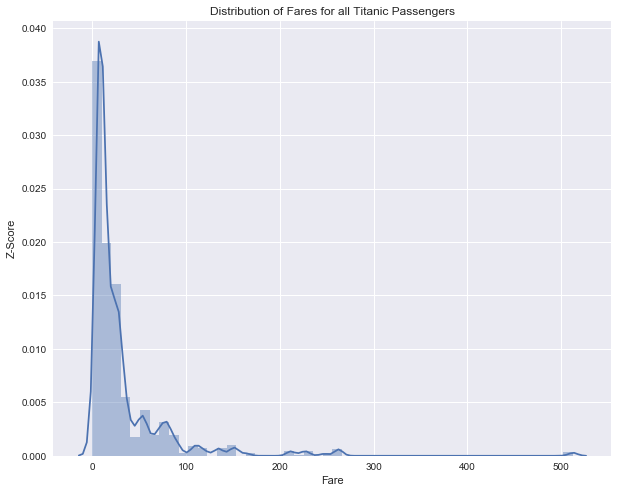

In [34]:
# create a visualization of fare using the seaborn distribution plot
fare_dist = sns.distplot(titanic_df['Fare'])
fare_dist.set_xlabel("Fare")
fare_dist.set_ylabel("Z-Score")
fare_dist.set_title("Distribution of Fares for all Titanic Passengers")

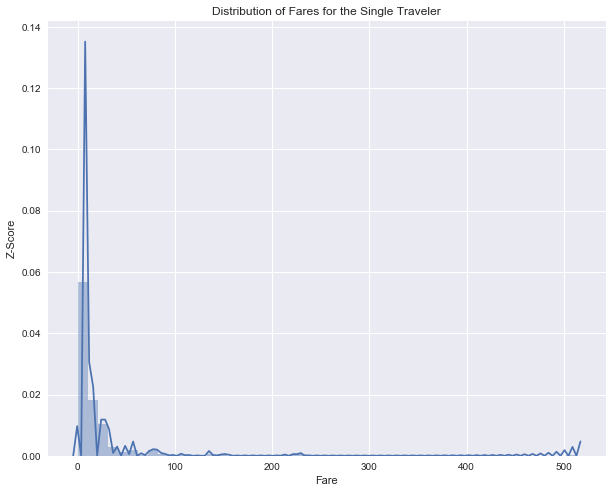

In [35]:
# creat a vizualtization of fare for individual travels using seaborn distribution plot
fare_dist = sns.distplot(individualTravelers_df['Fare'])
fare_dist.set_xlabel("Fare")
fare_dist.set_ylabel("Z-Score")
fare_dist.set_title("Distribution of Fares for the Single Traveler")

It makes sense that fare would track closely with Pclass.  There are a lot of third class passengers.

### Conclusions

Passengers who were adult males, traveling without family, and poor seemed more likely to die.  It wasn't clear in my analysis yet if it's because there were so many of them or if there was a real reason.
<br><br>
I would have liked to do more with cabin or ticket to see where a passenger's room would be located.  It would have be interesting to see if third class passengers had rooms below deck and maybe had a harder time escaping.  The high number of null values prevented analysis.
<br><br>
I didn't examine any of the names to see if there were families incorrectly categorized as not having children, a sibling, parent, or spouse.
<br><br>
I would like to learn more about the embarkment cities.  Why were there so many people boarding in Southampton?  There isn't anything in the data that says why.  I would benefit from examing the demographic data.
<br><br>
I also thought it was interesting that so many poor, single men were on board and there were also children traveling alone.  I always thought the Titanic was "vacation" cruise ship.  Those types of travels made me think of imigration instead of vacation.  It would be good to study the history of that time to understand more.

### Assumptions

Class is related to fare.  Cabins were ignored since they were mostly null.

### Acknowledgements

- https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
- http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
- https://github.com/womenindatascienceatx/titanic-EDA/blob/master/Titanic%204-21-2016%20-%20Answers.ipynb

##### Template Version History
1.0, 06/30/2017, Created